In [24]:
#!pip install geopandas
!pip install pysal
!pip install pysal==2.0.0
!pip install descartes

  Could not find a version that satisfies the requirement pysal==2.0.0 (from versions: 1.4.1, 1.5.0, 1.6.0, 1.7.0, 1.8.0, 1.9.1, 1.10.0, 1.11.0, 1.11.1, 1.11.2, 1.12.0, 1.13.0, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.4.post1, 1.14.4.post2)
No matching distribution found for pysal==2.0.0


In [25]:
!pip install --ignore-installed geopandas

  Using cached https://files.pythonhosted.org/packages/5b/0c/e6c99e561b03482220f00443f610ccf4dce9b50f4b1093d735f93c6fc8c6/geopandas-0.6.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/9b/9a/04dcffd4ff9bc064c05f723be71177cfb593d5ce6e4d6185c3ef8b7a4be9/pyproj-2.2.2-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/81/d1/b8e1b089a8ddd6df74be583d70373eac55c725c6197c115efbd3c3e1509f/Shapely-1.6.4.post2-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/db/83/7d4008ffc2988066ff37f6a0bb6d7b60822367dcb36ba5e39aa7801fda54/pandas-0.24.2-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/89/dd/289641061a69bb9b302e9fd52e5532f8345f6b277d8f4c98419fbbef1a14/Fiona-1.8.13-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/6a/c8/1b8513155e4bc68f322e2fbaf90708dd66290a0edaa604ea1675357d18ee/aenum-2.2.3-py2-none-any.whl
  Usin

# Uploading necessary libraries

In [26]:
import geopandas as gp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import pylab
import descartes
import numpy as np

%matplotlib inline

plt.style.use('ggplot')
pylab.rcParams['figure.figsize'] = (40., 32.)

# Dataframes 
## Cleaning data
We first upload the sexual assaults data. It needed to be cleaned. 
### Sexual offences data
In the crime type column (here entitled 'MajorText') we only selected the type of crime relevant for our study: 'Sexual Offences'. 

In [27]:
data_path = "./data/borough_heatmap/MPS Borough Level Crime (most recent 24 months).csv"

sexassaults = pd.read_csv(data_path)
sexassaults= sexassaults[sexassaults['MajorText']=='Sexual Offences']
sexassaults.head()

,MajorText,MinorText,LookUp_BoroughName,201712,201801,201802,201803,201804,201805,201806,...,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911
35,Sexual Offences,Other Sexual Offences,Barking and Dagenham,17,17,17,30,28,30,36,...,21,27,23,32,41,36,18,33,40,34
36,Sexual Offences,Rape,Barking and Dagenham,21,24,10,17,19,27,15,...,32,28,27,19,26,23,23,30,34,23
84,Sexual Offences,Other Sexual Offences,Barnet,33,36,28,37,23,37,37,...,32,26,23,37,27,27,34,26,25,32
85,Sexual Offences,Rape,Barnet,19,17,16,23,35,54,18,...,12,19,11,16,15,13,18,14,30,26
129,Sexual Offences,Other Sexual Offences,Bexley,20,24,19,27,23,26,22,...,18,18,18,16,19,26,11,20,25,24


### 2019 data
Then, because we wanted to illustrate the offences of 2019 only, we summed up the number of sexual offences (Rape and Other Sexual Offences) happening in the same borough each month to get the total of sexual offences in 2019. We then dropped all other numerical columns for less confusion and in order to conserve the 2019 column only.


In [28]:
sexassaults=sexassaults.set_index(['LookUp_BoroughName'])
sexassaults['2019']=(sexassaults['201901']+sexassaults['201902']+sexassaults['201903']+sexassaults['201904']
                     +sexassaults['201905']+sexassaults['201906']+sexassaults['201907']+sexassaults['201908']
                     +sexassaults['201909']+sexassaults['201910']+sexassaults['201911'])
sexassaults= sexassaults.drop(columns=['201712', '201802','201801','201802','201803','201804','201805',
                                       '201806','201807','201808','201809','201810','201811','201812',
                                       '201901','201902','201903','201904','201905','201906','201907',
                                       '201908','201909','201910','201911'])
sexassaults.head()

,MajorText,MinorText,2019
LookUp_BoroughName,,,
Barking and Dagenham,Sexual Offences,Other Sexual Offences,331
Barking and Dagenham,Sexual Offences,Rape,286
Barnet,Sexual Offences,Other Sexual Offences,323
Barnet,Sexual Offences,Rape,188
Bexley,Sexual Offences,Other Sexual Offences,218


### Joining all sexual offences
Each borough then had two rows and two 2019 indices: one for the number of rapes, and one for other sexual offences. Thus, we created a new column ('Total') to group them both together.

In [29]:
total = sexassaults.groupby(['LookUp_BoroughName'])['2019'].sum()
sexassaults['Total'] = total
sexassaults.head()

,MajorText,MinorText,2019,Total
LookUp_BoroughName,,,,
Barking and Dagenham,Sexual Offences,Other Sexual Offences,331,617
Barking and Dagenham,Sexual Offences,Rape,286,617
Barnet,Sexual Offences,Other Sexual Offences,323,511
Barnet,Sexual Offences,Rape,188,511
Bexley,Sexual Offences,Other Sexual Offences,218,354


## Geographic data

In [30]:
data = "data/borough_heatmap/London_Borough_Excluding_MHW.shp"

mapBoroughs = gp.read_file(data)
mapBoroughs.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."


# Merging geographic and informative dataframes

In [31]:
geosexassaults = mapBoroughs.merge(sexassaults, left_on= 'NAME', right_on= 'LookUp_BoroughName', how= 'inner')
geosexassaults

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,MajorText,MinorText,2019,Total
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",Sexual Offences,Other Sexual Offences,202,338
1,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",Sexual Offences,Rape,136,338
2,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",Sexual Offences,Other Sexual Offences,523,979
3,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",Sexual Offences,Rape,456,979
4,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",Sexual Offences,Other Sexual Offences,347,511
5,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",Sexual Offences,Rape,164,511
6,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",Sexual Offences,Other Sexual Offences,298,491
7,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",Sexual Offences,Rape,193,491
8,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",Sexual Offences,Other Sexual Offences,398,666
9,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",Sexual Offences,Rape,268,666


### Projecting the data
For the data to be projected for plotting, we needed to convert the data to CRS.

In [32]:
original_crs = geosexassaults.crs
target_crs = {'datum':'WGS84', 'no_defs':True, 'proj':'merc'}
projected_geosexassaults = geosexassaults.to_crs(crs=target_crs)
geosexassaults

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,MajorText,MinorText,2019,Total
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",Sexual Offences,Other Sexual Offences,202,338
1,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",Sexual Offences,Rape,136,338
2,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",Sexual Offences,Other Sexual Offences,523,979
3,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",Sexual Offences,Rape,456,979
4,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",Sexual Offences,Other Sexual Offences,347,511
5,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",Sexual Offences,Rape,164,511
6,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",Sexual Offences,Other Sexual Offences,298,491
7,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",Sexual Offences,Rape,193,491
8,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",Sexual Offences,Other Sexual Offences,398,666
9,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",Sexual Offences,Rape,268,666


In [33]:
#Install the geopandas module
#!pip install --ignore-installed geopandas

#Uninstall any existing version; forcing Yes
!pip uninstall --yes pysal

#Install newest branch
!pip install pysal==1.14.4

  Using cached https://files.pythonhosted.org/packages/5b/0c/e6c99e561b03482220f00443f610ccf4dce9b50f4b1093d735f93c6fc8c6/geopandas-0.6.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/9b/9a/04dcffd4ff9bc064c05f723be71177cfb593d5ce6e4d6185c3ef8b7a4be9/pyproj-2.2.2-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/81/d1/b8e1b089a8ddd6df74be583d70373eac55c725c6197c115efbd3c3e1509f/Shapely-1.6.4.post2-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/db/83/7d4008ffc2988066ff37f6a0bb6d7b60822367dcb36ba5e39aa7801fda54/pandas-0.24.2-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/89/dd/289641061a69bb9b302e9fd52e5532f8345f6b277d8f4c98419fbbef1a14/Fiona-1.8.13-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/6a/c8/1b8513155e4bc68f322e2fbaf90708dd66290a0edaa604ea1675357d18ee/aenum-2.2.3-py2-none-any.whl
  Usin

# Creating the heatmap
Inspired from the workshop studied in class, we created the heatmap with the following code:

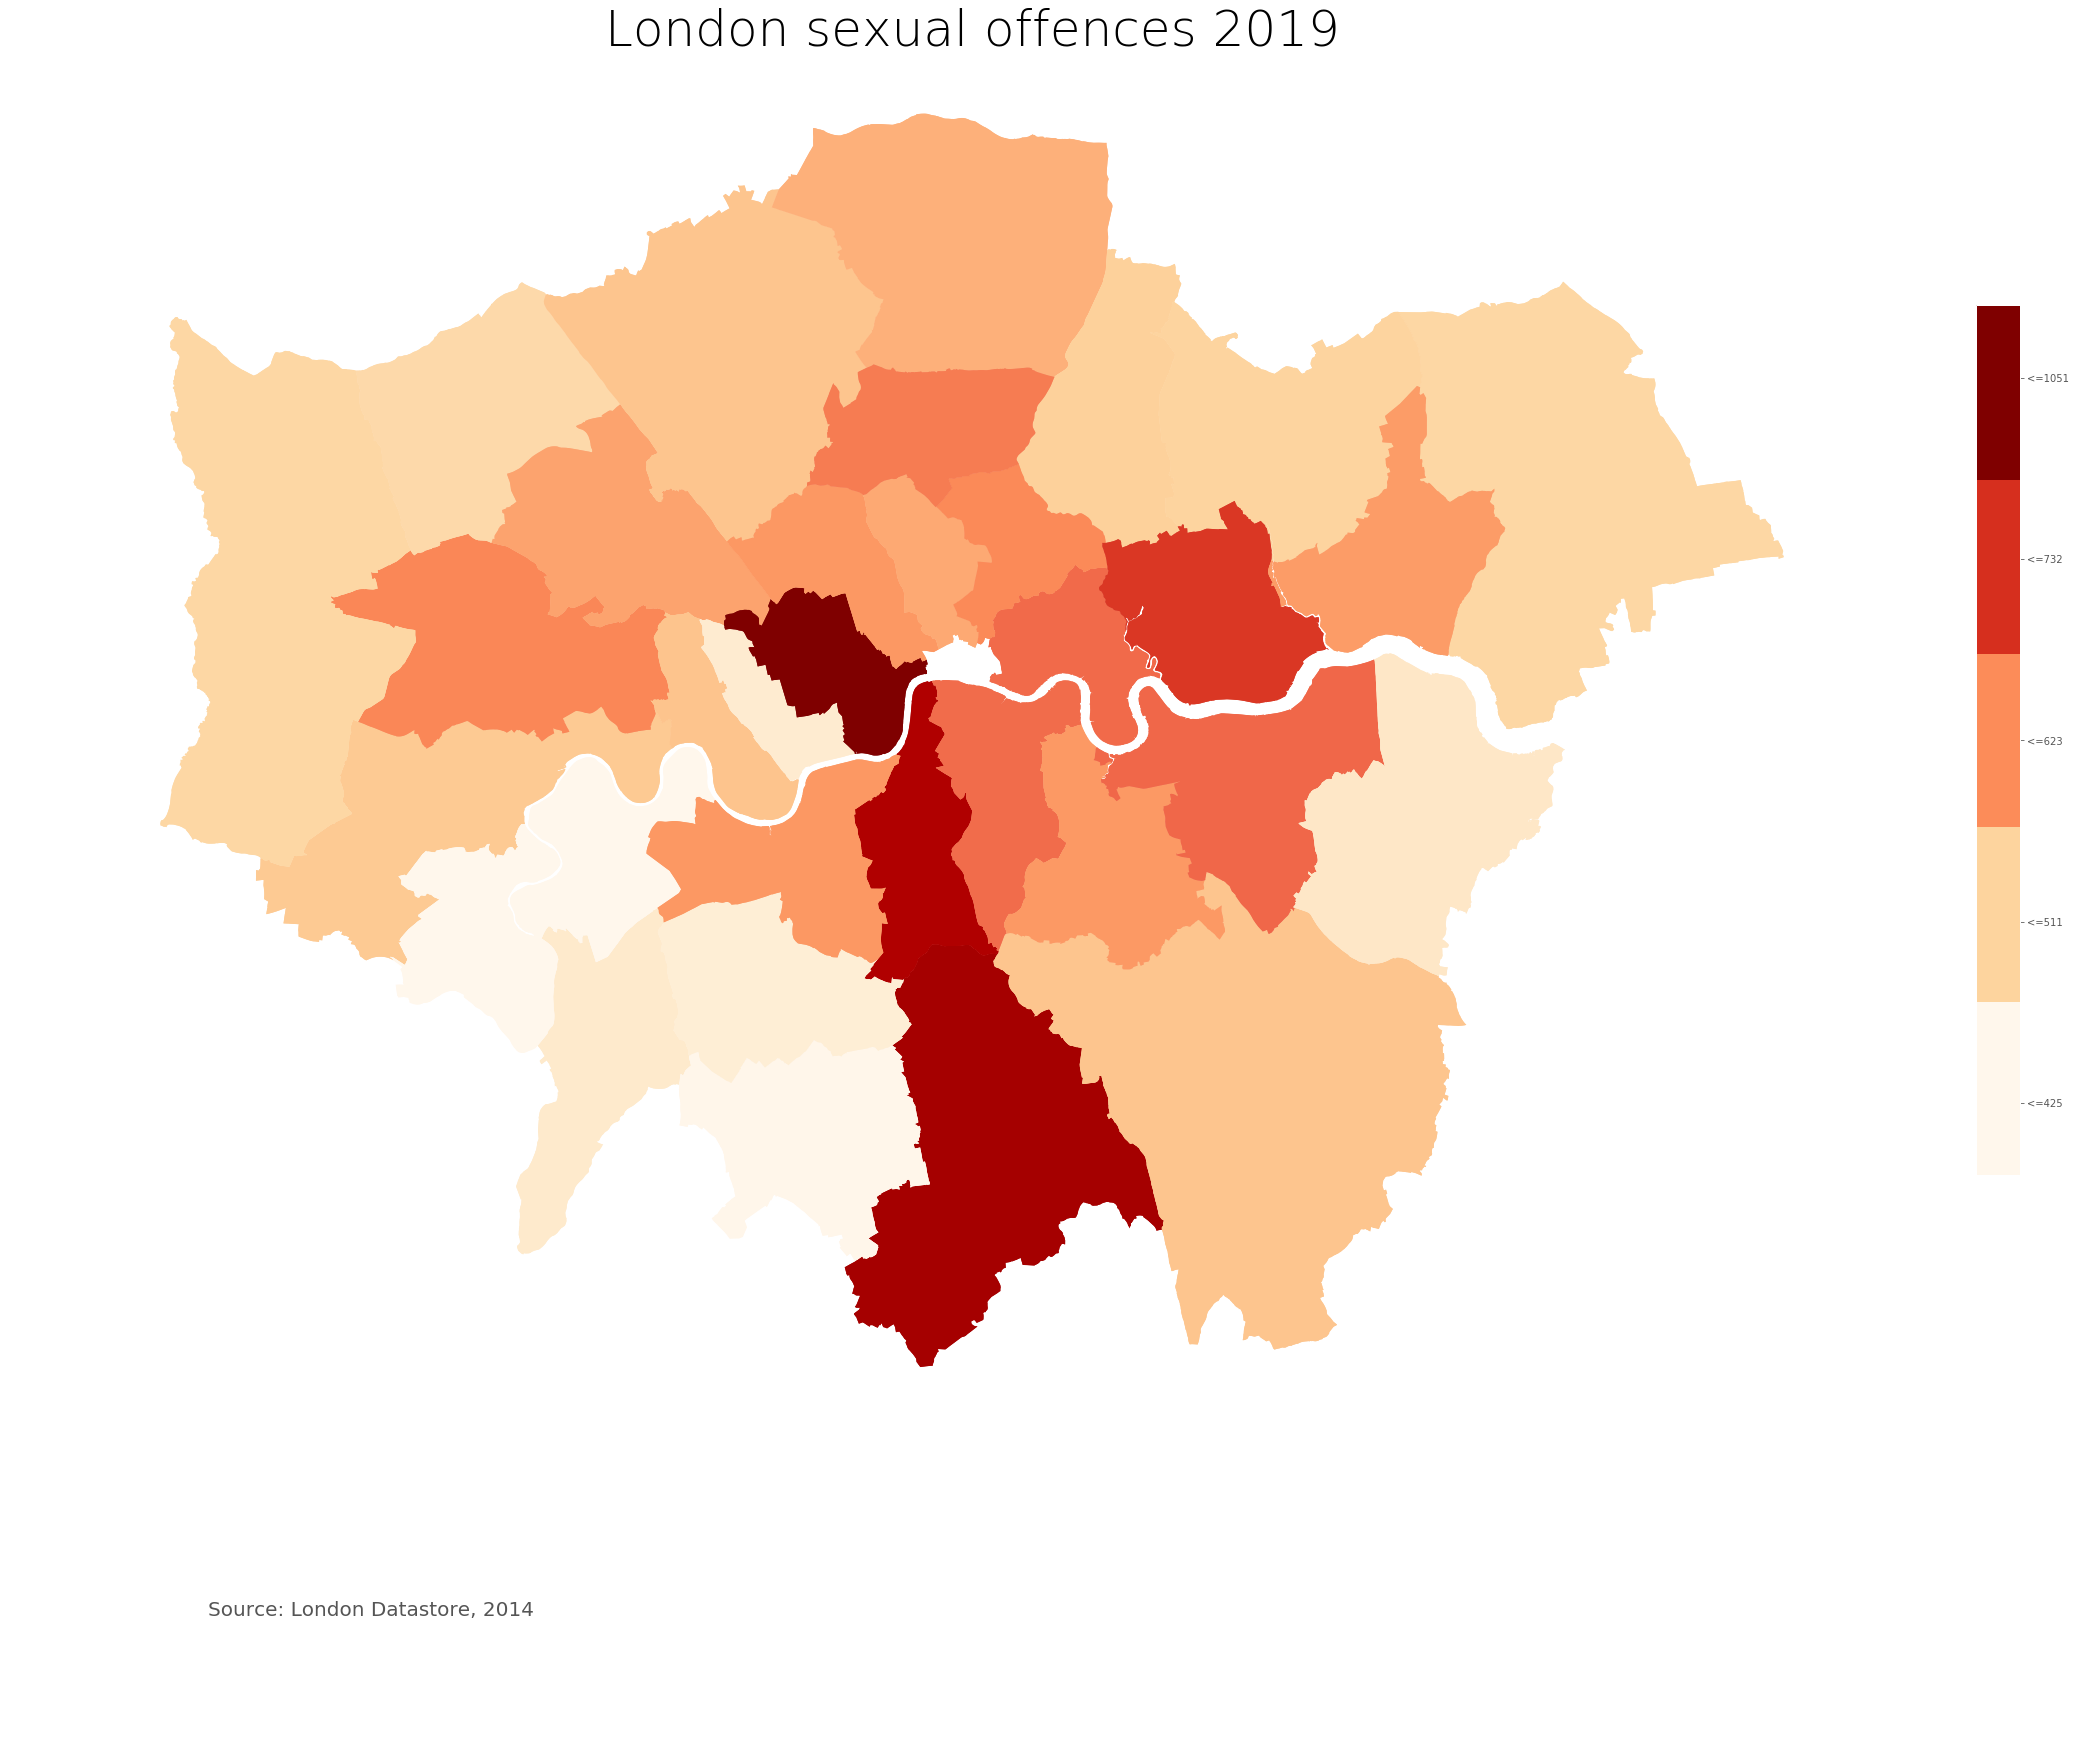

In [34]:
# Convenience functions for working with colour ramps and bars
def colorbar_index(ncolors, cmap, labels=None, **kwargs):
    """
    This is a convenience function to stop you making off-by-one errors
    Takes a standard colour ramp, and discretizes it,
    then draws a colour bar with correctly aligned labels
    """
    cmap = cmap_discretize(cmap, ncolors)
    mappable = plt.cm.ScalarMappable(cmap=cmap)
    mappable.set_array([])
    mappable.set_clim(-0.5, ncolors+0.5)
    colorbar = matplotlib.pyplot.colorbar(mappable, **kwargs)
    colorbar.set_ticks(np.linspace(0, ncolors, ncolors))
    colorbar.set_ticklabels(range(ncolors))
    if labels:
        colorbar.set_ticklabels(labels)
    return colorbar

def cmap_discretize(cmap, N):
    """
    Return a discrete colormap from the continuous colormap cmap.

        cmap: colormap instance, eg. cm.jet. 
        N: number of colors.

    Example
        x = resize(arange(100), (5,100))
        djet = cmap_discretize(cm.jet, 5)
        imshow(x, cmap=djet)

    """
    if type(cmap) == str:
        cmap = get_cmap(cmap)
    colors_i = np.concatenate((np.linspace(0, 1., N), (0., 0., 0., 0.)))
    colors_rgba = cmap(colors_i)
    indices = np.linspace(0, 1., N + 1)
    cdict = {}
    for ki, key in enumerate(('red', 'green', 'blue')):
        cdict[key] = [(indices[i], colors_rgba[i - 1, ki], colors_rgba[i, ki]) for i in xrange(N+1)]
    return matplotlib.colors.LinearSegmentedColormap(cmap.name + "_%d" % N, cdict, 1024)

from pysal.esda.mapclassify import Quantiles

# to create and split values for the colorbar
breaks = Quantiles(
    geosexassaults['Total'].values,
    k=5)
bar_labels = ['<=%i'% b for b in breaks.bins]

# select the data to analyze, and set a title
geosexassaults.plot(column='Total', colormap='OrRd', k=5)
plt.title('London sexual offences 2019', \
              fontdict={'fontsize': '50',
                        'fontweight' : '3'})

# create an annotation for the  data source
plt.annotate('Source: London Datastore, 2014',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=20, color='#555555')

#remove axis
plt.axis('off')

cmap = plt.get_cmap('OrRd')
colorbar_index(ncolors=5, cmap=cmap, shrink=0.5, labels=bar_labels)
plt.savefig('./data/heat_map/2019map_sexassaults.png',bbox_inches = 'tight')

In [35]:
new_data = sexassaults.loc[['Camden','Westminster','Brent','Richmond upon Thames']]

#to keep only one row for each borough
grouped = new_data.groupby(level=0)
new_data = grouped.last()
new_data= new_data.reset_index()

#have only Borough Name and number of sexual assaults inb dataframe
new_data= new_data[['LookUp_BoroughName','Total']].copy()
new_data=new_data.rename(columns={"LookUp_BoroughName": "Borough","Total":"Sexual Offences in London 2019"})
new_data

,Borough,Sexual Offences in London 2019
0,Brent,603
1,Camden,627
2,Richmond upon Thames,250
3,Westminster,1051


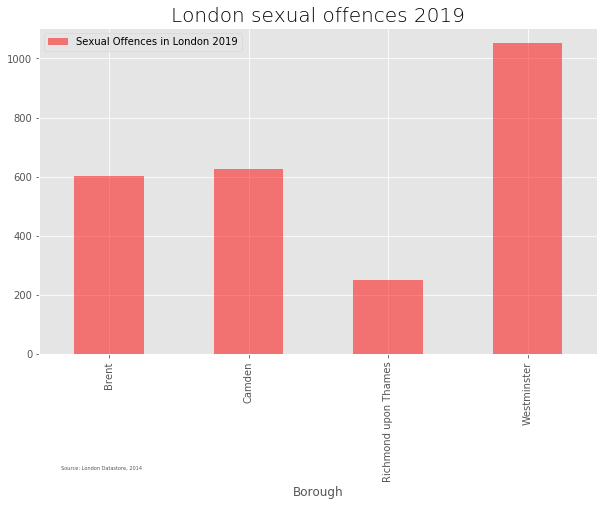

In [36]:
fig, ax = plt.subplots(1, figsize=(10, 6))

new_data.plot.bar(x='Borough', y="Sexual Offences in London 2019", facecolor='red', alpha=0.5, ax=ax)



ax.set_title('London sexual offences 2019', 
              fontdict={'fontsize': '20',
                        'fontweight' : '3'})


ax.annotate('Source: London Datastore, 2014',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=5, color='#555555')

fig.savefig('./data/histogram.png', bbox_inches = 'tight')



In [110]:
state_unemployment = pd.read_csv(u'./Book6-2.csv')
state_unemployment.head()

,Borough Code,Borough,Unemployment.Rate.2015,Crime.2015,Median.Income.2015,Clubs.2015,Resident.pop.2013,Crime.N,SA2015,Sexual.Offences,Clubs.10000,Income,Crime.N.1,16-64.Ageprop,Drug,Drug.N
0,E09000002,Barking and Dagenham,11.0,"17,477","22,100",10,"201,979",86.528798,413,2.044767,0.495101,221,0.086529,63.1,"1,170",5.792681
1,E09000003,Barnet,8.5,"24,978","27,700",20,"379,691",65.785073,482,1.269453,0.526744,277,0.065785,64.9,846,2.228128
2,E09000004,Bexley,7.6,"12,644","24,500",20,"242,142",52.217294,298,1.230683,0.825962,245,0.052217,62.9,703,2.903255
3,E09000005,Brent,7.5,"26,128","23,200",15,"324,012",80.638989,527,1.626483,0.462946,232,0.080639,67.8,"1,862",5.746701
4,E09000006,Bromley,5.3,"21,137","29,800",20,"324,857",65.065552,413,1.271329,0.615656,298,0.065066,62.6,859,2.644240


In [111]:
#cleaning data
state_unemployment.replace(',', '', regex=True, inplace=True)
state_unemployment['Median.Income.2015'] = state_unemployment['Median.Income.2015'].replace('-', 'NaN', regex=True).astype('float')
state_unemployment['Crime.2015'] = state_unemployment['Crime.2015'].replace('-', 'NaN', regex=True).astype('float')
state_unemployment['Drug'] = state_unemployment['Drug'].replace('-', 'NaN', regex=True).astype('float')

In [112]:
sexassaults1= sexassaults.drop(columns=['MajorText','MinorText','2019'])
sexassaults1.head()

,Total
LookUp_BoroughName,
Barking and Dagenham,617
Barking and Dagenham,617
Barnet,511
Barnet,511
Bexley,354


In [113]:
df= state_unemployment[[u'Borough','Borough Code','Unemployment.Rate.2015','Crime.2015','Median.Income.2015','Clubs.2015','16-64.Ageprop','Sexual.Offences','Drug']].copy()
df.head()

,Borough,Borough Code,Unemployment.Rate.2015,Crime.2015,Median.Income.2015,Clubs.2015,16-64.Ageprop,Sexual.Offences,Drug
0,Barking and Dagenham,E09000002,11.0,17477.0,22100.0,10,63.1,2.044767,1170.0
1,Barnet,E09000003,8.5,24978.0,27700.0,20,64.9,1.269453,846.0
2,Bexley,E09000004,7.6,12644.0,24500.0,20,62.9,1.230683,703.0
3,Brent,E09000005,7.5,26128.0,23200.0,15,67.8,1.626483,1862.0
4,Bromley,E09000006,5.3,21137.0,29800.0,20,62.6,1.271329,859.0


In [114]:
df= df.merge(sexassaults1, left_on= 'Borough', right_on = 'LookUp_BoroughName')
df= df.drop(columns=['Sexual.Offences'])

In [115]:
#changing numbers to integers
df = df.astype({'Unemployment.Rate.2015':'int'})
df = df.astype({'Crime.2015': 'int'})
df = df.astype({'Median.Income.2015': 'int'})
df = df.astype({'Clubs.2015': 'int'})
df = df.astype({'16-64.Ageprop': 'int'})
df = df.astype({'Drug': 'int'})
df = df.sort_values(by=['Borough Code'])
df.head()

,Borough,Borough Code,Unemployment.Rate.2015,Crime.2015,Median.Income.2015,Clubs.2015,16-64.Ageprop,Drug,Total
0,Barking and Dagenham,E09000002,11,17477,22100,10,63,1170,617
1,Barking and Dagenham,E09000002,11,17477,22100,10,63,1170,617
2,Barnet,E09000003,8,24978,27700,20,64,846,511
3,Barnet,E09000003,8,24978,27700,20,64,846,511
4,Bexley,E09000004,7,12644,24500,20,62,703,354


In [119]:
#drop eveyr two row
df = df.iloc[::2]
df.head()

,Borough,Borough Code,Unemployment.Rate.2015,Crime.2015,Median.Income.2015,Clubs.2015,16-64.Ageprop,Drug,Total
0,Barking and Dagenham,E09000002,11,17477,22100,10,63,1170,617
2,Barnet,E09000003,8,24978,27700,20,64,846,511
4,Bexley,E09000004,7,12644,24500,20,62,703,354
6,Brent,E09000005,7,26128,23200,15,67,1862,603
8,Bromley,E09000006,5,21137,29800,20,62,859,511


In [120]:
#mapBoroughs
merged = mapBoroughs.merge(df, left_on= 'NAME', right_on='Borough', how='inner')
#Read data to json.
merged_json = json.loads(merged.to_json())
#Convert to String like object.
json_data = json.dumps(merged_json)

In [125]:
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer
from bokeh.io import curdoc, output_notebook
from bokeh.models import Slider, HoverTool
from bokeh.layouts import widgetbox, row, column

#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)

palette = brewer['OrRd'][8]

#Reverse color order so that dark blue is highest rate.
palette = palette[::-1]


color_mapper = LinearColorMapper(palette = palette, low = 0, high = 1051)

#Define custom tick labels for color bar.
tick_labels = {'425':'<=425', '511':'<=511', '623':'<=623', '732':'<=732', '1051':'<=1051'}
hover = HoverTool(tooltips = [ ('Borough','@{Borough}'),
                               ('Borough Code', '@{Borough Code}'),
                                ('Unemployment rate','@{Unemployment.Rate.2015}'),
                               ('Crimes','@{Crime.2015}'),
                               ('Clubs','@{Clubs.2015}'),
                               ('Income','@{Median.Income.2015}'),
                               ('Drug Use','@{Drug}'),
                              ('% of working age population','@{16-64.Ageprop}')])

#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)

#Create figure object.
p = figure(title = 'London profiles 2015 and sexual offences in 2019', plot_height = 600 , plot_width = 950, tools = [hover])
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'Total', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
#Specify figure layout.
p.add_layout(color_bar, 'below')
#Display figure inline in Jupyter Notebook.
#output_notebook()
#Display figure.
#show(p)
#data_path = "./finalvizz.html"
#output_file(data_path, title="London profiles for 2015 and sexual offences in 2019")

In [109]:
#data_path = "./finalvizz.html"
#output_file(data_path, title="London profiles for 2015 and sexual offences in 2019")